# 3. Polynomial Regression (다항 회귀)


example) 기업의 성장 단계/주택 전기 요금(누진세)  
이런 데이터는 1차 방정식으로는 표현하기 어려움  
이럴 때 다항 회귀를 사용  

### Polynomial Regression 다항회귀
$y = b + m_1x + m_2x^2 + \cdots + m_nx^n$  
독립변수를 확장하는 개념  
직선보다는 곡선으로 표현  

###  공부 시간에 따른 시험 점수 (우등생)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("PolynomialRegressionData.csv")

In [3]:
dataset.head()

,hour,score
0,0.2,2
1,0.5,4
2,0.8,6
3,0.9,4
4,1.2,6


In [4]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## 3-1. 단순 선형 회귀 (Simple Linear Regression

In [5]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X, y) # 전체 데이터로 학습

LinearRegression()

### 데이터 시각화(전체)

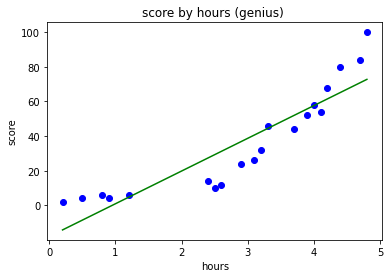

In [6]:
plt.scatter(X, y, color='blue') # 산점도
plt.plot(X, reg.predict(X), color='green') # 선 그래프
plt.title('score by hours (genius) ')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [7]:
reg.score(X, y) # 전체 데이터를 통한 모델 평가

0.8169296513411765

## 3-2  다항 회귀 (Polynomial Regression)

In [8]:
from sklearn.preprocessing import PolynomialFeatures
#poly_reg = PolynomialFeatures(degree=2) # 2차 다항식 생성
poly_reg = PolynomialFeatures(degree=4) # 4차 다항식 생성
#poly_reg = PolynomialFeatures(degree=10) # 10차 다항식 생성  => 과대 적합
X_poly = poly_reg.fit_transform(X)
X_poly[:5]
# n차 방정식 만큼 Feature을 생성한다.
# [X] => [X^0, x^1, X^2] => X가 3이라면 [1, 3, 9] 으로 변환

array([[1.0000e+00, 2.0000e-01, 4.0000e-02, 8.0000e-03, 1.6000e-03],
       [1.0000e+00, 5.0000e-01, 2.5000e-01, 1.2500e-01, 6.2500e-02],
       [1.0000e+00, 8.0000e-01, 6.4000e-01, 5.1200e-01, 4.0960e-01],
       [1.0000e+00, 9.0000e-01, 8.1000e-01, 7.2900e-01, 6.5610e-01],
       [1.0000e+00, 1.2000e+00, 1.4400e+00, 1.7280e+00, 2.0736e+00]])

In [9]:
X[:5]

array([[0.2],
       [0.5],
       [0.8],
       [0.9],
       [1.2]])

In [10]:
poly_reg.get_feature_names_out()

array(['1', 'x0', 'x0^2', 'x0^3', 'x0^4'], dtype=object)

In [11]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y) # 변환된 X와 y를 가지고 모델을 생성 (학습)

LinearRegression()

### 데이터 시각화 (변환된 X와 y)

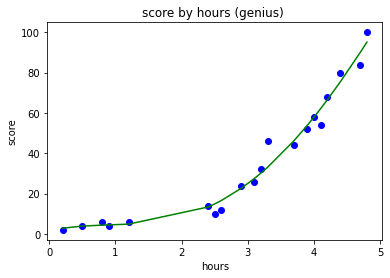

In [12]:
plt.scatter(X, y, color='blue')
plt.plot(X, lin_reg.predict(poly_reg.fit_transform(X)), color='green')
plt.title('score by hours (genius) ')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [13]:
X_range = np.arange(min(X), max(X), 0.1) # X의 최소값에서 최대값까지의 범위를 0.1 단위로 잘라서 데이터를 생성
X_range

array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4,
       1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7,
       2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. ,
       4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7])

In [14]:
X_range.shape

(46,)

In [15]:
X[:5]

array([[0.2],
       [0.5],
       [0.8],
       [0.9],
       [1.2]])

In [16]:
X_range = X_range.reshape(-1, 1) # row cnt(-1은 전체 == len(X_range) ), col cnt
# row 개수는 자동으로 계산, column 개수는 1개
X_range.shape

(46, 1)

In [17]:
X_range[:5]

array([[0.2],
       [0.3],
       [0.4],
       [0.5],
       [0.6]])

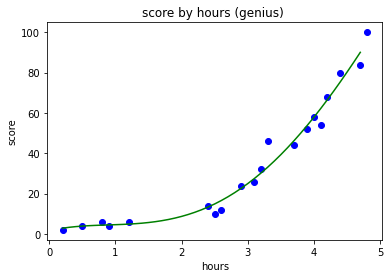

In [18]:
plt.scatter(X, y, color='blue')
plt.plot(X_range, lin_reg.predict(poly_reg.fit_transform(X_range)), color='green')
plt.title('score by hours (genius) ')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

### 공부 시간에 따른 시험 성적 예측

In [19]:
reg.predict([[2]]) # 2시간을 공부했을 때 선형 회귀 모델의 예측

array([19.85348988])

In [20]:
lin_reg.predict(poly_reg.fit_transform([[2]])) # 2시간을 공부했을 때 다항 회귀 모델의 예측

array([8.70559135])

In [21]:
lin_reg.score(X_poly, y)

0.9782775579000046